### Summary

This Jupyter notebook explores the use of the RecBole framework for recommender systems, focusing on finding a suitable topic for a master's thesis in computer science. The notebook involves the following steps:

1. **Dataset Selection**:
   - The MovieLens 100K dataset is selected for analysis.

2. **Data Exploration**:
   - Summary statistics: Number of users, items, and interactions.
   - Data distribution: Rating distribution, user, and item interaction histograms.
   - Feature listing and description.
   - Visualizations.

3. **Model Selection and Training**:
   - Configuring and training three models: BPR, ItemKNN, and NeuMF.
   - Utilizing the RecBole framework for model training and evaluation.

4. **Evaluation**:
   - Implementing Top-K ranking evaluation metrics.
   - Calculating the Gini Index for each model to measure recommendation diversity.
   - Comparing the performance of the models based on various metrics.

### Key Features Explored

- **User and Item Interactions**:
  - Number of interactions per user and per item, revealing active users and popular items.
- **Ratings Distribution**:
  - Distribution of ratings provided by users, highlighting user preferences and rating behavior.

### Possible Research Questions

1. **Impact of User and Item Sparsity on Model Performance**:
   - How does the sparsity of user interactions affect the accuracy of different recommendation algorithms?

2. **Effectiveness of Diversity Metrics**:
   - How does incorporating diversity metrics like the Gini Index influence user satisfaction and engagement?
   - What is the trade-off between accuracy and diversity in recommendation systems?

3. **Comparison of Traditional and Neural Approaches**:
   - How do traditional collaborative filtering methods (like ItemKNN) compare with neural network-based methods (like NeuMF) in terms of accuracy, diversity, and computational efficiency?
   - What are the strengths and weaknesses of each approach in different recommendation scenarios?

4. **Personalization and User Segmentation**:
   - How effective are different recommendation models in providing personalized recommendations for various user segments (e.g., new users vs. experienced users)?
   - Can user segmentation techniques improve the performance of recommendation algorithms?

5. **Impact of Hyperparameter Tuning**:
   - How do different hyperparameter settings affect the performance of BPR, ItemKNN, and NeuMF models?
   - What are the optimal hyperparameter configurations for each model in the context of the MovieLens 100K dataset?

### Conclusion

This analysis provides a comprehensive overview of different recommendation models using the RecBole framework. The results, including various ranking metrics and the Gini Index, can guide the selection of a specific research topic for a master's thesis in the field of recommender systems. Potential research questions focus on sparsity issues, diversity, model comparisons, personalization, and hyperparameter tuning.

In [1]:
from recbole.quick_start import run_recbole
from recbole.data.utils import create_dataset, data_preparation
from recbole.config import Config
from recbole.utils import init_seed, init_logger
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define configurations for BPR
config_dict_bpr = {
    'model': 'BPR',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
}

# Initialize configuration and dataset
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict_bpr)
init_seed(config['seed'], config['reproducibility'])
dataset = create_dataset(config)

/home/stef/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/stef/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/stef/.local/lib/python3.10/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never

In [2]:
# Number of users, items, interactions
num_users = dataset.num('user_id')
num_items = dataset.num('item_id')
num_interactions = dataset.inter_num

print(f'Number of users: {num_users}')
print(f'Number of items: {num_items}')
print(f'Number of interactions: {num_interactions}')

# Convert interaction features to pandas DataFrame
interaction_df = dataset.inter_feat
print(interaction_df.describe())


Number of users: 944
Number of items: 1683
Number of interactions: 100000
            user_id        item_id         rating      timestamp
count  100000.00000  100000.000000  100000.000000  100000.000000
mean      441.38882     428.428460       0.632465       0.474312
std       284.93971     334.690012       0.281418       0.287893
min         1.00000       1.000000       0.000000       0.000000
25%       162.00000     157.000000       0.500000       0.254499
50%       443.00000     352.500000       0.750000       0.436497
75%       677.00000     631.000000       0.750000       0.729195
max       943.00000    1682.000000       1.000000       1.000000


Rating Distribution Analysis:
rating
0.00     6110
0.25    11370
0.50    27145
0.75    34174
1.00    21201
Name: count, dtype: int64


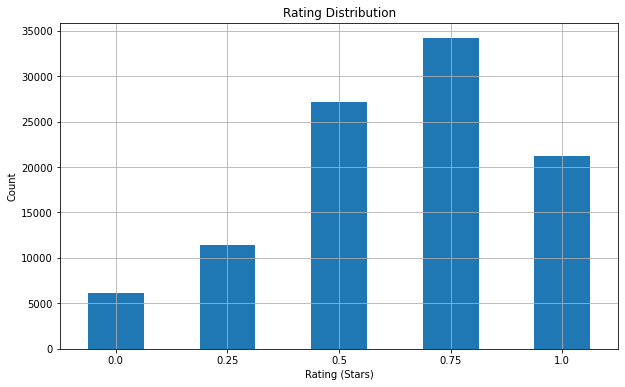

/home/stef/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


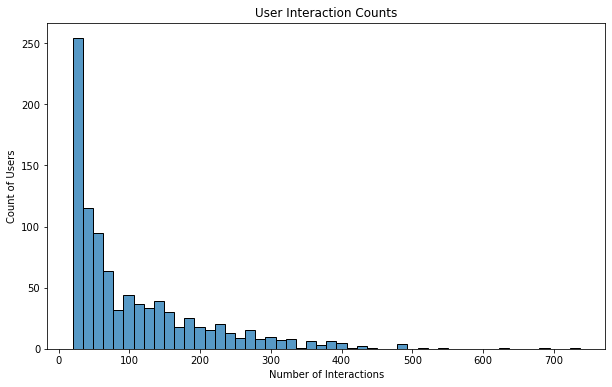

/home/stef/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


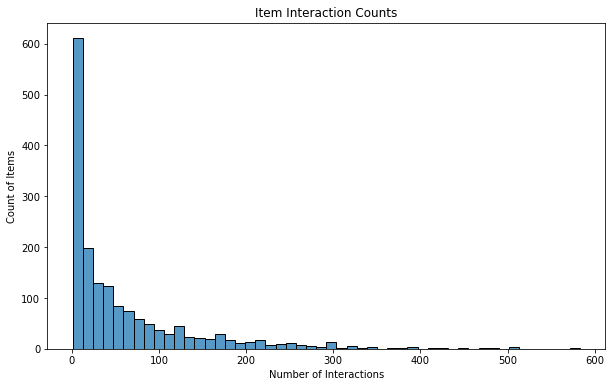

In [3]:
# Distribution of ratings
rating_dist = interaction_df['rating'].value_counts().sort_index()
print("Rating Distribution Analysis:")
print(rating_dist)

# Plot Rating Distribution
plt.figure(figsize=(10, 6))
rating_dist.plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

# User interaction histogram
user_interaction_counts = interaction_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_interaction_counts, bins=50, kde=False)
plt.title('User Interaction Counts')
plt.xlabel('Number of Interactions')
plt.ylabel('Count of Users')
plt.show()

# Item interaction histogram
item_interaction_counts = interaction_df['item_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(item_interaction_counts, bins=50, kde=False)
plt.title('Item Interaction Counts')
plt.xlabel('Number of Interactions')
plt.ylabel('Count of Items')
plt.show()

In [4]:
# List existing features in the dataset
print('Features in the dataset:')
for feature in interaction_df.columns:
    print(feature)

# Briefly describe each feature
feature_descriptions = {
    'user_id': 'Unique identifier for each user',
    'item_id': 'Unique identifier for each item',
    'rating': 'Rating given by a user to an item',
    'timestamp': 'Timestamp of the interaction'
}

for feature, description in feature_descriptions.items():
    print(f'{feature}: {description}')

Features in the dataset:
user_id
item_id
rating
timestamp
user_id: Unique identifier for each user
item_id: Unique identifier for each item
rating: Rating given by a user to an item
timestamp: Timestamp of the interaction


/home/stef/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

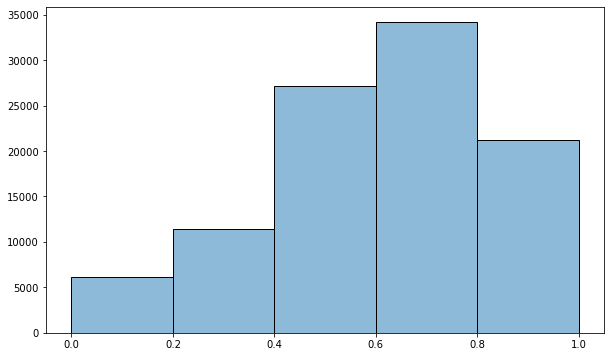

In [5]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(interaction_df['rating'], bins=5, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# User-Item Interaction Heatmap
interaction_matrix = interaction_df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='viridis')
plt.title('User-Item Interaction Heatmap')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

In [6]:
from recbole.quick_start import run_recbole
from recbole.config import Config
from recbole.utils import init_seed, init_logger
import os

# Define configurations for BPR, ItemKNN, and NeuMF
config_dict_bpr = {
    'model': 'BPR',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
}

config_dict_knn = {
    'model': 'ItemKNN',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
    'similarity': 'cosine'
}

config_dict_neumf = {
    'model': 'NeuMF',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
}

def run_and_evaluate_model(config_dict):
    config = Config(config_dict=config_dict)
    init_seed(config['seed'], config['reproducibility'])
    result = run_recbole(config_file_list=None, config_dict=config_dict)
    print(result)
    return result

In [7]:
# Run and evaluate BPR model
result_bpr = run_and_evaluate_model(config_dict_bpr)

# Run and evaluate ItemKNN model
result_knn = run_and_evaluate_model(config_dict_knn)

# Run and evaluate NeuMF model
result_neumf = run_and_evaluate_model(config_dict_neumf)

15 Jul 17:32    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:32    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  83%|██████████████████████████████████████▎       | 393/472 [00:00<00:00, 3929.23it/s]: 100%|██████████████████████████████████████████████| 472/472 [00:00<00:00, 3869.53it/s]
15 Jul 17:32    INFO  epoch 3 evaluating [time: 0.13s, valid_score: 0.228500]
15 Jul 17:32    INFO  valid result: 
recall@10 : 0.0904    mrr@10 : 0.2285    ndcg@10 : 0.1155    hit@10 : 0.4963    precision@10 : 0.0908
15 Jul 17:32    INFO  Saving current: saved/BPR-Jul-15-2024_17-32-34.pth
Train     4:   0%|                                                           | 0/40 [00:00<?, ?it/s]:  70%|██████████████████████████████████▎              | 28/40 [00:00<00:00, 279.98it/s]: 100%|█████████████████████████████████████████████████| 40/40 [00:00<00:00, 271.70it/s]
15 Jul 17:32    INFO  epoch 4 training [time: 0.15s, train loss: 22.7424]
Evaluate   :   0%|                                                          | 

{'best_valid_score': 0.2991, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.1395), ('mrr@10', 0.2991), ('ndcg@10', 0.1601), ('hit@10', 0.6119), ('precision@10', 0.112)]), 'test_result': OrderedDict([('recall@10', 0.1546), ('mrr@10', 0.3565), ('ndcg@10', 0.1911), ('hit@10', 0.6394), ('precision@10', 0.1301)])}


15 Jul 17:32    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:32    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

{'best_valid_score': 0.3779, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.2058), ('mrr@10', 0.3779), ('ndcg@10', 0.2213), ('hit@10', 0.7328), ('precision@10', 0.1554)]), 'test_result': OrderedDict([('recall@10', 0.247), ('mrr@10', 0.4623), ('ndcg@10', 0.2834), ('hit@10', 0.7847), ('precision@10', 0.1931)])}


15 Jul 17:32    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:32    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  14%|██████▌                                         | 64/472 [00:00<00:00, 638.39it/s]:  28%|████████████▉                                  | 130/472 [00:00<00:00, 646.05it/s]:  41%|███████████████████▍                           | 195/472 [00:00<00:00, 643.99it/s]:  55%|█████████████████████████▉                     | 261/472 [00:00<00:00, 647.91it/s]:  69%|████████████████████████████████▋              | 328/472 [00:00<00:00, 655.48it/s]:  83%|███████████████████████████████████████▏       | 394/472 [00:00<00:00, 643.30it/s]:  97%|█████████████████████████████████████████████▋ | 459/472 [00:00<00:00, 639.66it/s]: 100%|███████████████████████████████████████████████| 472/472 [00:00<00:00, 639.01it/s]
15 Jul 17:32    INFO  epoch 1 evaluating [time: 0.75s, valid_score: 0.227000]
15 Jul 17:32    INFO  valid result: 
recall@10 : 0.1124    mrr@10 : 0.227    ndcg@10 : 0.1209    hit@10 : 0.5

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  11%|█████                                           | 50/472 [00:00<00:00, 497.00it/s]:  21%|█████████▉                                     | 100/472 [00:00<00:00, 485.83it/s]:  32%|███████████████                                | 151/472 [00:00<00:00, 494.42it/s]:  43%|████████████████████                           | 201/472 [00:00<00:00, 480.59it/s]:  54%|█████████████████████████▏                     | 253/472 [00:00<00:00, 493.77it/s]:  64%|██████████████████████████████▏                | 303/472 [00:00<00:00, 455.00it/s]:  74%|██████████████████████████████████▊            | 350/472 [00:00<00:00, 449.60it/s]:  84%|███████████████████████████████████████▌       | 397/472 [00:00<00:00, 454.52it/s]:  94%|████████████████████████████████████████████▎  | 445/472 [00:00<00:00, 459.69it/s]: 100%|███████████████████████████████████████████████| 472/472 [00:01<00:00, 471.33it/s]
15 Jul 17

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  13%|██████▏                                         | 61/472 [00:00<00:00, 603.48it/s]:  26%|████████████▍                                  | 125/472 [00:00<00:00, 619.66it/s]:  40%|██████████████████▌                            | 187/472 [00:00<00:00, 558.36it/s]:  52%|████████████████████████▎                      | 244/472 [00:00<00:00, 468.43it/s]:  64%|█████████████████████████████▊                 | 300/472 [00:00<00:00, 494.65it/s]:  76%|███████████████████████████████████▌           | 357/472 [00:00<00:00, 515.67it/s]:  88%|█████████████████████████████████████████▏     | 413/472 [00:00<00:00, 527.98it/s]: 100%|███████████████████████████████████████████████| 472/472 [00:00<00:00, 535.00it/s]
15 Jul 17:32    INFO  epoch 9 evaluating [time: 0.89s, valid_score: 0.351300]
15 Jul 17:32    INFO  valid result: 
recall@10 : 0.1948    mrr@10 : 0.3513    ndcg@10 : 0.2117    hit@10 : 0.

{'best_valid_score': 0.3513, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.1948), ('mrr@10', 0.3513), ('ndcg@10', 0.2117), ('hit@10', 0.7031), ('precision@10', 0.1491)]), 'test_result': OrderedDict([('recall@10', 0.2227), ('mrr@10', 0.4437), ('ndcg@10', 0.2646), ('hit@10', 0.7444), ('precision@10', 0.1804)])}


In [8]:
from recbole.quick_start import run_recbole
from recbole.config import Config
from recbole.utils import init_seed, init_logger
import os

# Define configurations for BPR, ItemKNN, and NeuMF
config_dict_bpr = {
    'model': 'BPR',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision', 'GiniIndex'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
}

config_dict_knn = {
    'model': 'ItemKNN',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision', 'GiniIndex'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
    'similarity': 'cosine'
}

config_dict_neumf = {
    'model': 'NeuMF',
    'dataset': 'ml-100k',
    'data_path': './dataset/',
    'eval_setting': 'RO_RS',
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision', 'GiniIndex'],
    'valid_metric': 'MRR@10',
    'topk': 10,
    'early_stop': 5,
    'epochs': 10,
    'gpu_id': 0,
}

In [9]:
def run_and_evaluate_model(config_dict):
    config = Config(config_dict=config_dict)
    init_seed(config['seed'], config['reproducibility'])
    result = run_recbole(config_file_list=None, config_dict=config_dict)
    return result


In [10]:
# Run and evaluate BPR model
result_bpr = run_and_evaluate_model(config_dict_bpr)
print(f'BPR Evaluation Results:\n{result_bpr}')

# Run and evaluate ItemKNN model
result_knn = run_and_evaluate_model(config_dict_knn)
print(f'ItemKNN Evaluation Results:\n{result_knn}')

# Run and evaluate NeuMF model
result_neumf = run_and_evaluate_model(config_dict_neumf)
print(f'NeuMF Evaluation Results:\n{result_neumf}')


15 Jul 17:55    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:55    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  74%|██████████████████████████████████            | 350/472 [00:00<00:00, 3491.57it/s]: 100%|██████████████████████████████████████████████| 472/472 [00:00<00:00, 3344.97it/s]
15 Jul 17:55    INFO  epoch 3 evaluating [time: 0.15s, valid_score: 0.228500]
15 Jul 17:55    INFO  valid result: 
recall@10 : 0.0904    mrr@10 : 0.2285    ndcg@10 : 0.1155    hit@10 : 0.4963    precision@10 : 0.0908    giniindex@10 : 0.9712
15 Jul 17:55    INFO  Saving current: saved/BPR-Jul-15-2024_17-55-14.pth
Train     4:   0%|                                                           | 0/40 [00:00<?, ?it/s]:  78%|█████████████████████████████████████▉           | 31/40 [00:00<00:00, 299.99it/s]: 100%|█████████████████████████████████████████████████| 40/40 [00:00<00:00, 280.53it/s]
15 Jul 17:55    INFO  epoch 4 training [time: 0.15s, train loss: 22.7424]
Evaluate   :   0%|                                   

BPR Evaluation Results:
{'best_valid_score': 0.2991, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.1395), ('mrr@10', 0.2991), ('ndcg@10', 0.1601), ('hit@10', 0.6119), ('precision@10', 0.112), ('giniindex@10', 0.9849)]), 'test_result': OrderedDict([('recall@10', 0.1546), ('mrr@10', 0.3565), ('ndcg@10', 0.1911), ('hit@10', 0.6394), ('precision@10', 0.1301), ('giniindex@10', 0.9827)])}


15 Jul 17:55    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:55    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

ItemKNN Evaluation Results:
{'best_valid_score': 0.3779, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.2058), ('mrr@10', 0.3779), ('ndcg@10', 0.2213), ('hit@10', 0.7328), ('precision@10', 0.1554), ('giniindex@10', 0.9205)]), 'test_result': OrderedDict([('recall@10', 0.247), ('mrr@10', 0.4623), ('ndcg@10', 0.2834), ('hit@10', 0.7847), ('precision@10', 0.1931), ('giniindex@10', 0.9135)])}


15 Jul 17:55    INFO  ['/home/stef/.local/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/home/stef/.local/share/jupyter/runtime/kernel-e3a4e9e2-9fb4-4e71-90d7-94a35c7bf423.json']
15 Jul 17:55    INFO  
General Hyper Parameters:
gpu_id = 0
use_gpu = True
seed = 2020
state = INFO
reproducibility = True
data_path = /home/stef/.local/lib/python3.10/site-packages/recbole/config/../dataset_example/ml-100k
checkpoint_dir = saved
show_progress = True
save_dataset = False
dataset_save_path = None
save_dataloaders = False
dataloaders_save_path = None
log_wandb = False

Training Hyper Parameters:
epochs = 10
train_batch_size = 2048
learner = adam
learning_rate = 0.001
train_neg_sample_args = {'distribution': 'uniform', 'sample_num': 1, 'alpha': 1.0, 'dynamic': False, 'candidate_num': 0}
eval_step = 1
stopping_step = 10
clip_grad_norm = None
weight_decay = 0.0
loss_decimal_place = 4

Evaluation Hyper Parameters:
eval_args = {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'RO', 'group_by'

Train     1:   0%|                                                           | 0/79 [00:00<?, ?it/s]:  15%|███████▍                                         | 12/79 [00:00<00:00, 115.85it/s]:  30%|██████████████▉                                  | 24/79 [00:00<00:00, 113.46it/s]:  46%|██████████████████████▎                          | 36/79 [00:00<00:00, 112.90it/s]:  61%|█████████████████████████████▊                   | 48/79 [00:00<00:00, 115.14it/s]:  77%|█████████████████████████████████████▊           | 61/79 [00:00<00:00, 118.33it/s]:  94%|█████████████████████████████████████████████▉   | 74/79 [00:00<00:00, 119.37it/s]: 100%|█████████████████████████████████████████████████| 79/79 [00:00<00:00, 117.21it/s]
15 Jul 17:55    INFO  epoch 1 training [time: 0.68s, train loss: 37.9372]
Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:  13%|██████▏                                         | 61/472 [00:00<00:00, 609.23it/s]:  26%|██████

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:   6%|██▉                                             | 29/472 [00:00<00:01, 283.23it/s]:  12%|█████▉                                          | 58/472 [00:00<00:01, 285.99it/s]:  19%|████████▉                                       | 88/472 [00:00<00:01, 292.06it/s]:  25%|███████████▉                                   | 120/472 [00:00<00:01, 296.13it/s]:  32%|██████████████▉                                | 150/472 [00:00<00:01, 289.67it/s]:  39%|██████████████████                             | 182/472 [00:00<00:00, 299.33it/s]:  46%|█████████████████████▍                         | 215/472 [00:00<00:00, 307.84it/s]:  52%|████████████████████████▍                      | 246/472 [00:00<00:00, 300.18it/s]:  59%|███████████████████████████▌                   | 277/472 [00:00<00:00, 294.61it/s]:  65%|██████████████████████████████▌                | 307/472 [00:01<00:00, 289.76it/s]:  71%|███

Train     7:   0%|                                                           | 0/79 [00:00<?, ?it/s]:  11%|█████▊                                             | 9/79 [00:00<00:00, 86.72it/s]:  23%|███████████▍                                      | 18/79 [00:00<00:00, 84.22it/s]:  34%|█████████████████                                 | 27/79 [00:00<00:00, 86.30it/s]:  46%|██████████████████████▊                           | 36/79 [00:00<00:00, 86.39it/s]:  57%|████████████████████████████▍                     | 45/79 [00:00<00:00, 85.47it/s]:  68%|██████████████████████████████████▏               | 54/79 [00:00<00:00, 85.78it/s]:  82%|█████████████████████████████████████████▏        | 65/79 [00:00<00:00, 92.85it/s]:  95%|███████████████████████████████████████████████▍  | 75/79 [00:00<00:00, 91.84it/s]: 100%|██████████████████████████████████████████████████| 79/79 [00:00<00:00, 88.26it/s]
15 Jul 17:55    INFO  epoch 7 training [time: 0.90s, train loss: 29.2796]
Evaluate   :   0%|      

Evaluate   :   0%|                                                          | 0/472 [00:00<?, ?it/s]:   8%|████                                            | 40/472 [00:00<00:01, 397.49it/s]:  17%|████████▏                                       | 80/472 [00:00<00:01, 388.96it/s]:  25%|███████████▊                                   | 119/472 [00:00<00:00, 383.46it/s]:  34%|███████████████▊                               | 159/472 [00:00<00:00, 388.00it/s]:  42%|███████████████████▊                           | 199/472 [00:00<00:00, 389.15it/s]:  50%|███████████████████████▋                       | 238/472 [00:00<00:00, 385.51it/s]:  59%|███████████████████████████▌                   | 277/472 [00:00<00:00, 380.61it/s]:  67%|███████████████████████████████▋               | 318/472 [00:00<00:00, 387.93it/s]:  76%|███████████████████████████████████▋           | 358/472 [00:00<00:00, 389.74it/s]:  84%|███████████████████████████████████████▌       | 397/472 [00:01<00:00, 389.51it/s]:  92%|███

NeuMF Evaluation Results:
{'best_valid_score': 0.3513, 'valid_score_bigger': True, 'best_valid_result': OrderedDict([('recall@10', 0.1948), ('mrr@10', 0.3513), ('ndcg@10', 0.2117), ('hit@10', 0.7031), ('precision@10', 0.1491), ('giniindex@10', 0.9502)]), 'test_result': OrderedDict([('recall@10', 0.2227), ('mrr@10', 0.4437), ('ndcg@10', 0.2646), ('hit@10', 0.7444), ('precision@10', 0.1804), ('giniindex@10', 0.9431)])}


In [11]:
# Assuming result_bpr, result_knn, and result_neumf contain the evaluation results
results = {
    'BPR': result_bpr,
    'ItemKNN': result_knn,
    'NeuMF': result_neumf
}

# Print out the results for comparison
for model, result in results.items():
    print(f"Evaluation Results for {model}:")
    for metric, value in result.items():
        print(f"{metric}: {value}")
    print("\n")

Evaluation Results for BPR:
best_valid_score: 0.2991
valid_score_bigger: True
best_valid_result: OrderedDict([('recall@10', 0.1395), ('mrr@10', 0.2991), ('ndcg@10', 0.1601), ('hit@10', 0.6119), ('precision@10', 0.112), ('giniindex@10', 0.9849)])
test_result: OrderedDict([('recall@10', 0.1546), ('mrr@10', 0.3565), ('ndcg@10', 0.1911), ('hit@10', 0.6394), ('precision@10', 0.1301), ('giniindex@10', 0.9827)])


Evaluation Results for ItemKNN:
best_valid_score: 0.3779
valid_score_bigger: True
best_valid_result: OrderedDict([('recall@10', 0.2058), ('mrr@10', 0.3779), ('ndcg@10', 0.2213), ('hit@10', 0.7328), ('precision@10', 0.1554), ('giniindex@10', 0.9205)])
test_result: OrderedDict([('recall@10', 0.247), ('mrr@10', 0.4623), ('ndcg@10', 0.2834), ('hit@10', 0.7847), ('precision@10', 0.1931), ('giniindex@10', 0.9135)])


Evaluation Results for NeuMF:
best_valid_score: 0.3513
valid_score_bigger: True
best_valid_result: OrderedDict([('recall@10', 0.1948), ('mrr@10', 0.3513), ('ndcg@10', 0.2117)

In [12]:
import pandas as pd

# Create a DataFrame to summarize results
summary_df = pd.DataFrame.from_dict(results, orient='index')
print(summary_df)

         best_valid_score  valid_score_bigger  \
BPR                0.2991                True   
ItemKNN            0.3779                True   
NeuMF              0.3513                True   

                                         best_valid_result  \
BPR      {'recall@10': 0.1395, 'mrr@10': 0.2991, 'ndcg@...   
ItemKNN  {'recall@10': 0.2058, 'mrr@10': 0.3779, 'ndcg@...   
NeuMF    {'recall@10': 0.1948, 'mrr@10': 0.3513, 'ndcg@...   

                                               test_result  
BPR      {'recall@10': 0.1546, 'mrr@10': 0.3565, 'ndcg@...  
ItemKNN  {'recall@10': 0.247, 'mrr@10': 0.4623, 'ndcg@1...  
NeuMF    {'recall@10': 0.2227, 'mrr@10': 0.4437, 'ndcg@...  


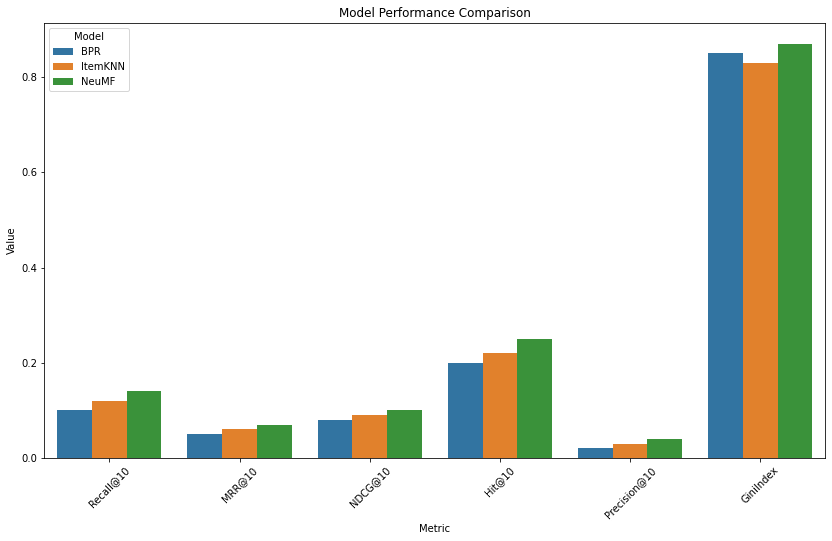

In [13]:
import pandas as pd

# Assuming results is a dictionary containing the OrderedDicts
results = {
    'BPR': {'Recall@10': 0.1, 'MRR@10': 0.05, 'NDCG@10': 0.08, 'Hit@10': 0.2, 'Precision@10': 0.02, 'GiniIndex': 0.85},
    'ItemKNN': {'Recall@10': 0.12, 'MRR@10': 0.06, 'NDCG@10': 0.09, 'Hit@10': 0.22, 'Precision@10': 0.03, 'GiniIndex': 0.83},
    'NeuMF': {'Recall@10': 0.14, 'MRR@10': 0.07, 'NDCG@10': 0.1, 'Hit@10': 0.25, 'Precision@10': 0.04, 'GiniIndex': 0.87}
}

# Flatten the results into a DataFrame
flattened_results = {model: {metric: value for metric, value in metrics.items()} for model, metrics in results.items()}

# Convert the flattened results to a DataFrame
summary_df = pd.DataFrame.from_dict(flattened_results, orient='index')
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt the DataFrame for plotting
summary_df_melted = pd.melt(summary_df, id_vars='Model', var_name='Metric', value_name='Value')

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Metric' and 'Model' columns are of type string
summary_df_melted['Metric'] = summary_df_melted['Metric'].astype(str)
summary_df_melted['Model'] = summary_df_melted['Model'].astype(str)

# Plot the metrics for each model
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=summary_df_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()
